In [5]:
import sys
from pathlib import Path
import os 
ROOT = Path().resolve().parent.parent
sys.path.append(str(ROOT))

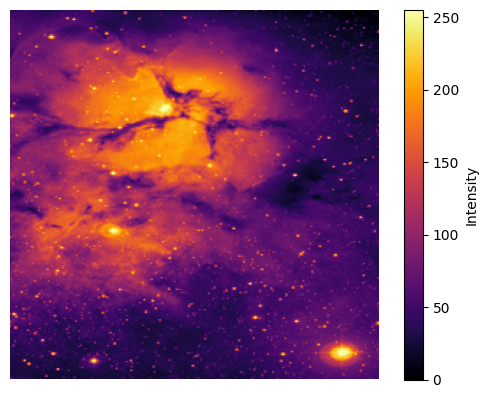

In [ ]:
# Convert a specific image to FITS format and show it
from src.preprocess.image_preprocessor import ImagePreprocessor
from src.utils.plot import plot_fits

image = 'eso0930a'
data_folder = ROOT / 'data'

data = data_folder / f"raw/eso/{image}.jpg"
output_folder = data_folder / f"processed/{image}"

size = 256
preprocessor = ImagePreprocessor(image_path=data, width=size, height=size)
preprocessor.convert_to_fits(output_folder=data_folder / f"processed/{image}", output_name="groundtruth")

fits_file = data_folder / f"processed/{image}/groundtruth.fits"
plot_fits(fits_file)

2025-08-28 18:28:33	WARN	noise::CTPatchedInterp::interpolate	In caltable groundtruth.alma.out23.noisy.T.cal_sim_temp (Tf Jones):
2025-08-28 18:28:33	WARN	noise::CTPatchedInterp::interpolate+	 Insufficient solution channel sampling (nchan=1) for frequency-dependent LINEAR interpolation 
2025-08-28 18:28:33	WARN	noise::CTPatchedInterp::interpolate+	 of calibration for MS spw=0; using NEAREST instead.
2025-08-28 18:28:34	WARN	noise::CTPatchedInterp::interpolate	In caltable groundtruth.alma.out21.noisy.T.cal_sim_temp (Tf Jones):
2025-08-28 18:28:34	WARN	noise::CTPatchedInterp::interpolate+	 Insufficient solution channel sampling (nchan=1) for frequency-dependent LINEAR interpolation 
2025-08-28 18:28:34	WARN	noise::CTPatchedInterp::interpolate+	 of calibration for MS spw=0; using NEAREST instead.
2025-08-28 18:28:35	WARN	noise::CTPatchedInterp::interpolate	In caltable groundtruth.alma.out20.noisy.T.cal_sim_temp (Tf Jones):
2025-08-28 18:28:35	WARN	noise::CTPatchedInterp::interpolate+	 Insu

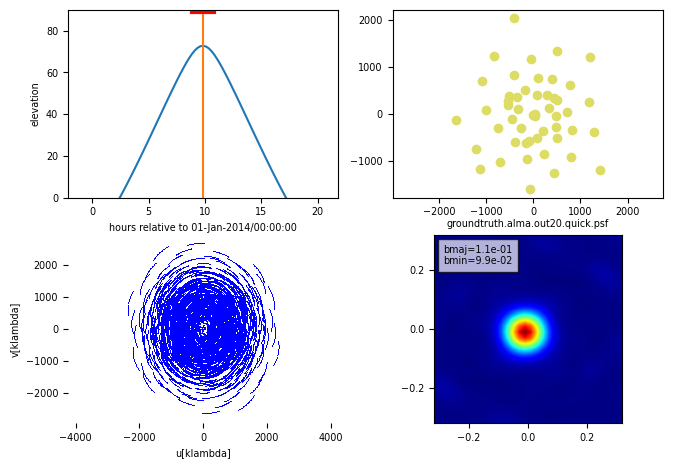

In [7]:
# Simulate a specific FITS image
from src.preprocess.simulator import Simulator

simobserve_configs = [
    {  
        'antenna' : 'alma.out23.cfg',
        'totaltime' : 30000, # in seconds
        'noise': 5,  # in Jy
        'arcsec': 0.02,  # in arcseconds
        'indirection': 'J2000 12h00m00 -23d00m00'
    },
    {
        'antenna' : 'alma.out21.cfg',
        'totaltime' : 14400, # in seconds
        'noise': 10, # in Jy
        'arcsec': 0.02, # in arcseconds
        'indirection': 'J2000 12h00m00 -30d00m00'
    },
    {
        'antenna' : 'alma.out20.cfg',
        'totaltime' : 7200, # in seconds
        'noise': 20,  # in Jy
        'arcsec': 0.02,  # in arcseconds
        'indirection': 'J2000 12h00m00 -40d00m00'
    }
]

for sim_number, simoberve_config in enumerate(simobserve_configs):
    simulator = Simulator(
        image = fits_file,
        output_folder = output_folder / f"sim{sim_number+1}",
        output_name = f"visibilities",
    )
    simulator.simobserve_simulate(simobserve_config=simoberve_config)

2025-08-28 18:28:36	WARN	task_tclean::SIImageStore::restore (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPOSX14ARMPY310/casa6/casatools/src/code/synthesis/ImagerObjects/SIImageStore.cc, line 2298)	Restoring with an empty model image. Only residuals will be processed to form the output restored image.


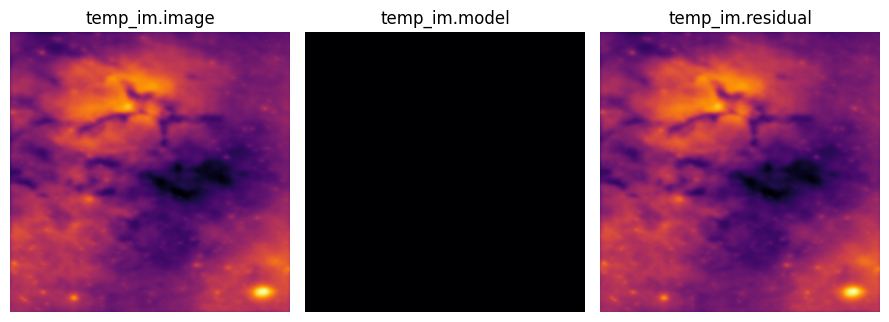

2025-08-28 18:28:36	WARN	task_tclean::SIImageStore::restore (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPOSX14ARMPY310/casa6/casatools/src/code/synthesis/ImagerObjects/SIImageStore.cc, line 2298)	Restoring with an empty model image. Only residuals will be processed to form the output restored image.


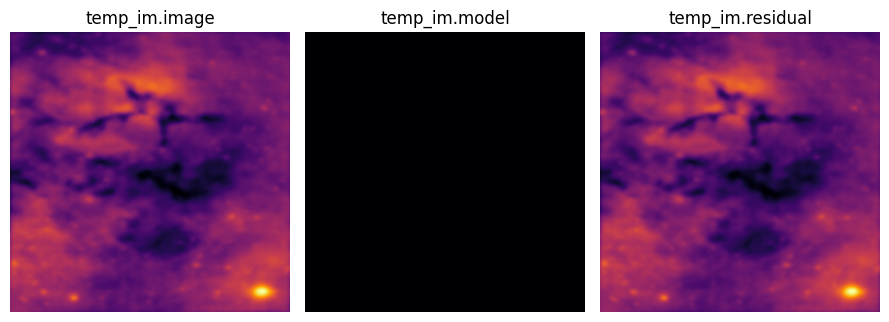

2025-08-28 18:28:36	WARN	task_tclean::SIImageStore::restore (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPOSX14ARMPY310/casa6/casatools/src/code/synthesis/ImagerObjects/SIImageStore.cc, line 2298)	Restoring with an empty model image. Only residuals will be processed to form the output restored image.


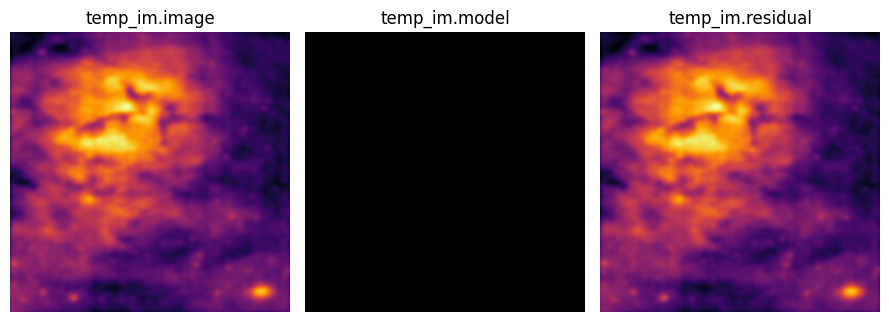

In [8]:
from src.utils.plot import plot_ms

for sim_number, simoberve_config in enumerate(simobserve_configs):
    ms_file = output_folder / f"sim{sim_number+1}/visibilities.ms"
    plot_ms(ms_file)